# Task 3

## Perform analysis on a MOOC dataset

### Draw the first 4 figures

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df1 = pd.read_csv("course_threads.csv")
df2 = pd.read_csv("course_information.csv")
df3 = pd.read_csv("course_posts.csv")

### Preparing data for Figure 1

In [3]:
df1.head()

,thread_id,course_id,og_forum,og_forum_id,parent_forum,parent_forum_id,forum_chain,depth,num_views,num_tags,forum_id
0,2,analysenumerique-001,"Questions d'ordre technique (coursera, octave,...",13,Forums,0.0,"Forums/ Questions d'ordre technique (coursera,...",2,277,0,13
1,3,analysenumerique-001,"Questions d'ordre technique (coursera, octave,...",13,Forums,0.0,"Forums/ Questions d'ordre technique (coursera,...",2,572,0,13
2,4,analysenumerique-001,"Questions d'ordre technique (coursera, octave,...",13,Forums,0.0,"Forums/ Questions d'ordre technique (coursera,...",2,196,0,13
3,7,analysenumerique-001,"Questions d'ordre technique (coursera, octave,...",13,Forums,0.0,"Forums/ Questions d'ordre technique (coursera,...",2,135,0,13
4,8,analysenumerique-001,"Questions d'ordre technique (coursera, octave,...",13,Forums,0.0,"Forums/ Questions d'ordre technique (coursera,...",2,188,0,13


In [4]:
data1 = df1.groupby('course_id')['thread_id'].count().reset_index(name='count').sort_values(['count'], ascending=False)

In [5]:
data1.head()

,course_id,count
33,intropsych-001,9300
58,videogameslearning-001,8694
35,lead-ei-001,7893
55,startup-001,6416
39,ml-003,5188


### Figure 1

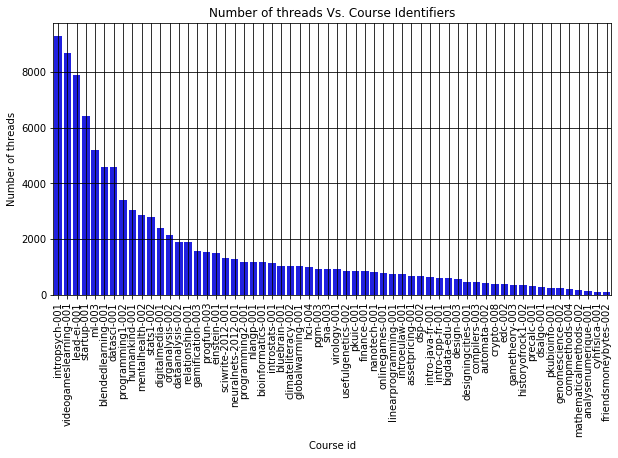

In [6]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x = 'course_id', y = 'count', 
              data = data1, 
              color = 'blue')
ax.set(xlabel='Course id', ylabel='Number of threads')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title('Number of threads Vs. Course Identifiers')
ax.grid(zorder=0, color='black')
plt.show()

### Preparing data for Figure 2a

In [7]:
data2x = df1.groupby([ "course_id"]).size().reset_index(name='thread_count')

In [8]:
data2x.head()

,course_id,thread_count
0,analysenumerique-001,119
1,assetpricing-001,673
2,automata-002,429
3,bigdata-edu-001,585
4,bioinformatics-001,1160


In [9]:
data2y = df1.groupby([ "thread_id"]).size().reset_index(name='thread_size')

In [10]:
data2y.head()

,thread_id,thread_size
0,1,46
1,2,50
2,3,48
3,4,55
4,5,51


In [11]:
data2ydf1 = pd.merge(data2y, df1, on='thread_id', how='inner')[[ 'course_id','thread_size']]

In [12]:
data2ydf1.head()

,course_id,thread_size
0,assetpricing-001,46
1,automata-002,46
2,bigdata-edu-001,46
3,blendedlearning-001,46
4,bluebrain-001,46


In [13]:
data2z = data2ydf1.groupby(['course_id']).mean()

In [14]:
data2z.head()

,thread_size
course_id,
analysenumerique-001,57.025210
assetpricing-001,48.829123
automata-002,52.655012
bigdata-edu-001,50.029060
bioinformatics-001,40.534483


In [15]:
data2xz = pd.merge(data2x, data2z, on='course_id', how='inner')

In [16]:
data2xz.head()

,course_id,thread_count,thread_size
0,analysenumerique-001,119,57.025210
1,assetpricing-001,673,48.829123
2,automata-002,429,52.655012
3,bigdata-edu-001,585,50.029060
4,bioinformatics-001,1160,40.534483


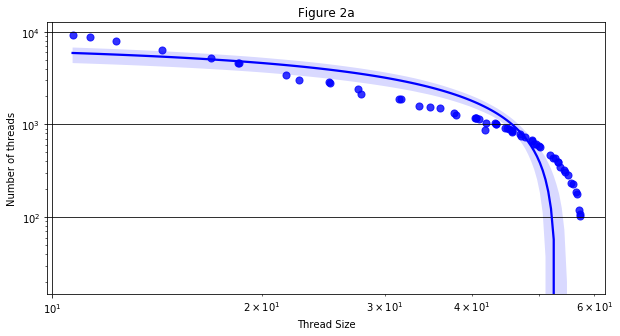

In [17]:
plt.figure(figsize=(10,5))
ax2 = sns.regplot(x = 'thread_size', y = 'thread_count', 
              data = data2xz, 
              color = 'blue',scatter_kws={"s": 50})
ax2.set(xlabel='Thread Size', ylabel='Number of threads')
ax2.set(xscale="log", yscale="log")
ax2.set_title('Figure 2a')
ax2.grid(zorder=1, color='black')
plt.show()

### Preparing data for Figure 2b

In [18]:
data2a = df3.groupby('course_id')['user_id'].nunique().reset_index(name='num_users')

In [19]:
data2a.head()

,course_id,num_users
0,analysenumerique-001,103
1,assetpricing-001,392
2,automata-002,493
3,bigdata-edu-001,710
4,bioinformatics-001,941


In [20]:
data2az = pd.merge(data2a, data2z, on='course_id', how='inner')

In [21]:
data2az.head()

,course_id,num_users,thread_size
0,analysenumerique-001,103,57.025210
1,assetpricing-001,392,48.829123
2,automata-002,493,52.655012
3,bigdata-edu-001,710,50.029060
4,bioinformatics-001,941,40.534483


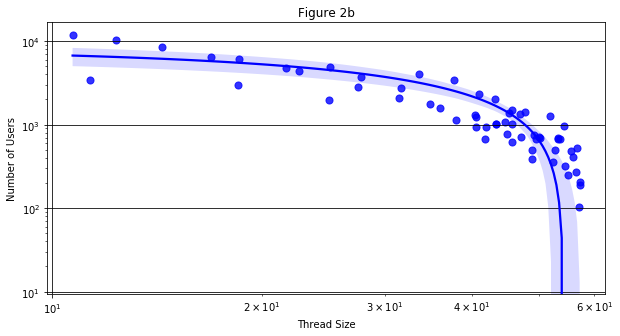

In [22]:
plt.figure(figsize=(10,5))
ax3 = sns.regplot(x = 'thread_size', y = 'num_users', 
              data = data2az, 
              color = 'blue',scatter_kws={"s": 50})
ax3.set(xlabel='Thread Size', ylabel='Number of Users')
ax3.set(xscale="log", yscale="log")
ax3.set_title('Figure 2b')
ax3.grid(zorder=1, color='black')
plt.show()

### Preparing data for Figure 3

In [23]:
df3.head()

,post_id,thread_id,course_id,parent_id,order,user_id,user_type,post_time,relative_t,votes,num_words,forum_id
0,3,2,analysenumerique-001,0,1,0,Anonymous,1358942448,-0.404753,2,23,13
1,4,2,analysenumerique-001,0,2,3992067770,Instructor,1359109877,-0.373994,0,15,13
2,7,2,analysenumerique-001,0,3,3992067770,Instructor,1359129778,-0.370338,1,9,13
3,8,2,analysenumerique-001,0,4,0,Anonymous,1359130161,-0.370267,0,2,13
4,15,2,analysenumerique-001,0,5,3992067770,Instructor,1359214077,-0.354851,0,31,13


In [24]:
data3 = df3.groupby('user_type')['post_id'].count().reset_index(name='count').sort_values(['count'], ascending=False)

In [25]:
data3

,user_type,count
6,Student,630713
0,Anonymous,70531
1,Community TA,17336
5,Staff,11986
4,Instructor,8118
3,Coursera Tech Support,228
2,Coursera Staff,162


### Figure 3

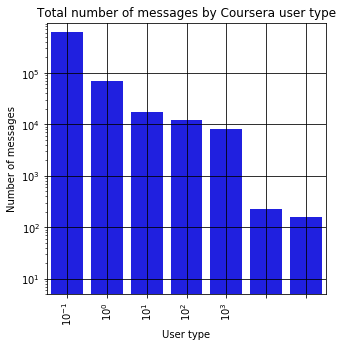

In [26]:
plt.figure(figsize=(5,5))
ax4 = sns.barplot(x = 'user_type', y = 'count', 
              data = data3, 
              color = 'blue')
ax4.set(xlabel='User type', ylabel='Number of messages')
ax4.set_xticklabels(ax3.get_xticklabels(), rotation=90)
ax4.set(yscale="log")
ax4.set_title('Total number of messages by Coursera user type')
ax4.grid(zorder=3, color='black')
plt.ylim(5)
plt.show()